In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/creditcard.csv')
df.shape

(284807, 31)

In [3]:
m = 10000
df = df.iloc[:m]
df.shape

(10000, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].mean() 
# 0.38% 사기 거래 > 클래스 불균형 > 정확도 의미없다
# recall 재현율이 의미있음 : 사기꾼 10명을 얾마만큼 찾아냈느냐
# Precision 정밀도 : 진짜정상/정상예측
# f1 : 두개의 조화 평균 2 * Prc *Rec / (Prc + Rec)

0.0038

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df_x = df.drop(columns=['Time', 'Class'])

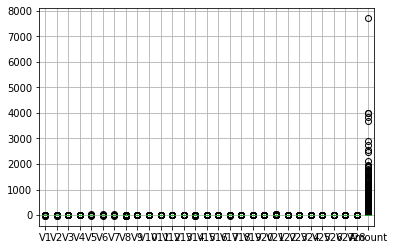

In [9]:
df_x.boxplot()

In [10]:
df_x.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000,-0.097724,-0.121651,0.048906,-0.195764,0.039366,-0.030594,0.229876,-0.112812,-0.183000,...,-0.010867,-0.127610,-0.031425,-0.116673,-0.010840,0.229927,0.046926,-0.086065,0.039544,-0.179395
V2,-0.097724,1.000000,-0.110161,0.073169,-0.061484,0.020603,0.128664,-0.175978,-0.082691,0.091575,...,0.068572,0.146151,-0.121138,0.066026,-0.030688,-0.143618,-0.082603,0.005770,-0.024787,-0.463937
V3,-0.121651,-0.110161,1.000000,0.017932,-0.045608,-0.135680,0.154046,0.000853,0.159135,0.150053,...,-0.078981,-0.043062,0.273281,-0.037822,0.026395,-0.214339,0.071371,-0.113966,-0.117349,-0.162458
V4,0.048906,0.073169,0.017932,1.000000,-0.091374,-0.007930,-0.101019,0.043785,-0.145626,0.023243,...,-0.042623,-0.012613,0.001773,-0.002442,-0.054253,-0.032193,0.038373,0.000274,0.034047,0.104773
V5,-0.195764,-0.061484,-0.045608,-0.091374,1.000000,0.110955,-0.139896,0.090985,-0.037047,0.087349,...,-0.006895,-0.045869,-0.115156,-0.054986,0.020278,-0.023284,-0.138153,0.014845,-0.149219,-0.390725
V6,0.039366,0.020603,-0.135680,-0.007930,0.110955,1.000000,-0.019390,-0.015609,-0.001543,0.087286,...,0.040162,0.068064,-0.064290,0.013235,0.026933,0.088973,-0.049399,-0.062792,0.004313,0.220732
V7,-0.030594,0.128664,0.154046,-0.101019,-0.139896,-0.019390,1.000000,0.149162,-0.025105,0.141523,...,0.068087,-0.155986,0.070590,0.013081,0.000126,-0.074627,-0.110700,-0.118736,-0.072621,0.327200
V8,0.229876,-0.175978,0.000853,0.043785,0.090985,-0.015609,0.149162,1.000000,-0.097410,-0.130051,...,0.056105,-0.325642,0.159203,-0.070183,0.007444,0.025635,0.029797,0.047551,0.083996,-0.078267
V9,-0.112812,-0.082691,0.159135,-0.145626,-0.037047,-0.001543,-0.025105,-0.097410,1.000000,0.117381,...,0.011384,-0.006749,0.033389,-0.013198,0.010285,0.120004,0.171552,-0.068005,-0.109917,-0.008965
V10,-0.183000,0.091575,0.150053,0.023243,0.087349,0.087286,0.141523,-0.130051,0.117381,1.000000,...,0.101815,0.028390,-0.117229,0.038951,0.039918,0.002935,-0.034280,-0.105927,-0.190802,-0.082571


In [11]:
from sklearn.preprocessing import StandardScaler

In [16]:
x = np.array(df_x)
scaler =StandardScaler().fit(x)
xn = scaler.transform(x)
np.mean(xn)

1.0143610089816603e-17

In [17]:
from sklearn.decomposition import PCA

In [19]:
x_pca = PCA(n_components=2).fit_transform(xn)
x_pca.shape

(10000, 2)

In [24]:
y = np.array(df['Class'])

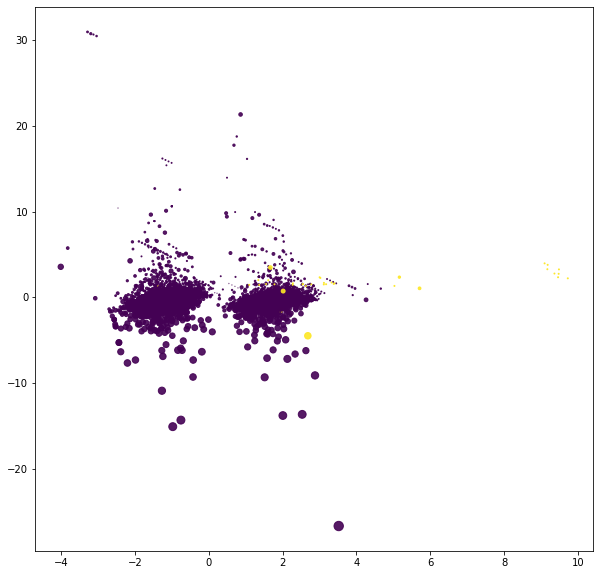

In [27]:
plt.figure(figsize=(10, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], s=np.sqrt(x[:, -1]), c=y, alpha=0.9)

In [34]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# model = KMeans(n_cluster=2).fit(x_pca)
# p = model.predict(x_pca)

In [36]:
p = AgglomerativeClustering(n_clusters=2).fit_predict(x_pca)

-22718.799281595504

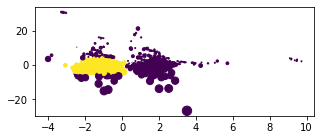

In [37]:
plt.figure(figsize=(5, 2))
plt.scatter(x_pca[:, 0], x_pca[:, 1], s=np.sqrt(x[:, -1]), c=p, alpha=1.0)
model.score(x_pca)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y, p))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58      9962
           1       0.00      0.03      0.00        38

    accuracy                           0.41     10000
   macro avg       0.50      0.22      0.29     10000
weighted avg       0.99      0.41      0.58     10000

